# Chapter 02

In [1]:
import pint
ureg = pint.UnitRegistry()

import numpy as np

from sympy import *
init_printing()

# force plots to display in notebook, not new window
%matplotlib inline

## Problem 2.20

Your company manufactures plastic wrap for food storage. The tear resistance of the wrap, denoted by X, must be controlled so that the wrap can be torn off the roll without too much effort but it does not tear too easily when in use.

In a series of test runs, 15 rolls of wrap are made under carefully controlled conditions and the tear resistance of each roll is measured. The results are used as the basis of a quality assurance specification (see problem 2.19). If X for a subsequently produced roll fails more than two standard deviations away from the test period average, the process is declared out of specification and production is suspended for routine maintenance.

The test series data are as follows

In [2]:
# define the given data
data = ((1, 134), (2, 131), (3, 129), (4, 133), (5, 135), 
        (6, 131), (7, 134),(8, 130),(9, 131),(10, 136),
        (11, 129),(12, 130),(13, 133),(14, 130),(15, 133))

(a) write a spreadsheet to take as input the test series data and calculate the sample mean (Xavg) and sample standard deviation (sx), preferably using built-in functions for the calculations.

In [5]:
# axis=0 specifies to take mean of xs and ys separately
# slice asks for just the y's mean

Xavg = np.mean(data, axis=0)[1]
Xstd = np.std(data, axis=0, ddof=1)[1]

print("Xavg is", Xavg)
print("Xstddev is", Xstd)

Xavg is 131.933333333
Xstddev is 2.2189658681


(b) the following tear resistance values are obtained for rolls produced in 14 consecutive production runs subsequent to the test series. On the spreadsheet, plot a control chart of X vs run number showing horizontal lines for the values corresponding to Xavg, X-2sx, and Xavg + 2sx from the test period and show the points corresponding to the 14 production runs. which measurements led to suspension of production?

In [6]:
# define new set of data as tuple of tuples and as list of x's and y's
roll2 = ((1,128), (2,131), (3,133), (4,130), (5,133),
         (6,129), (7,133), (8,135), (9,137), (10,133),
         (11,137), (12,136), (13,137), (14,139))
roll2x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
roll2y = [128, 131, 133, 130, 133, 129, 133, 135, 137, 133, 137, 136, 137, 139]

In [7]:
# Note: Must specify ddof=1 for std dev (default in numpy is 0)
print("Mean is", np.mean(roll2, axis=0)[1])
print("Std dev is", np.std(roll2, axis=0, ddof=1)[1])

Mean is 133.642857143
Std dev is 3.34220431307


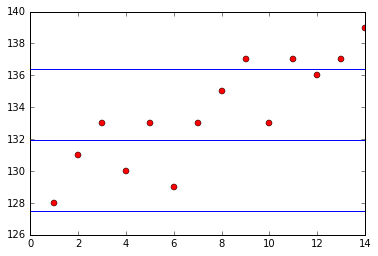

In [8]:
# I can't figure out how to plot discrete points using sympy's plot()
# so I reverted to matplotlib which I'm not familiar with
# There is probably an easier/simpler way than explicitly 
# making it like this

import matplotlib.pyplot as plt
x, y1 = symbols('x, y1')
#plot(Xavg+2*Xstd,Xavg-2*Xstd,(x,0,15),ylim=(80,150))
#plot(Xavg + 2*Xstd, (x,0,15))
#plot(Xavg - 2*Xstd, (x,0,15))

# only first and last points are needed if blue line
# option is used in matplotlib
xs = (0, 14)
top = (Xavg+2*Xstd, Xavg+2*Xstd)
bottom = (Xavg-2*Xstd, Xavg-2*Xstd)
middle = (Xavg,Xavg)

# plot using matplotlib with 'ro' for points and 'b-' for lines
plt.plot(roll2x,roll2y,'ro',xs,top,'b-',xs,bottom,'b-', xs, middle, 'b-')
#y1 = Xavg
#plot(y1,x**2, (x, 0, 100))